
Milestone 1

Nama  : Andryan Kalmer Wijaya
Batch : RMT-030

Program ini di buat untuk membantu pemliki rental sepeda

# About data

* https://www.kaggle.com/datasets/sreekargv/bike-rentals
* https://public.tableau.com/views/h8dsft_Milestone1_Andryan_wijaya/Dashboard2?:language=en-GB&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

# Identifikasi Masalah

## Problem statement

Mengetahui faktor yang mempengaruhi peminjaman sepeda listrik di india

## Objektif

* jam berapa penyewaan paling banyak di gunakan
* bagaimana kondisi penyewaan di setiap musimnya
* apakah hari libur mnegalami penurunan di banding hari kerja
* kapan waktu penywaan sepi

## SMART

- Spesifik: Menemukan waktu puncak untuk meningkatkan jumlah unit sepeda yang tersedia sehingga bisa mendapatkan profit maximal
- Measurable: Mengukur jumlah sewa sepeda dalam rentang waktu, termasuk jam, musiman, hari libur, dan hari kerja.
- Achievable: Memetakan waktu penggunaan sepeda untuk merencanakan peremajaan secara efisien, memastikan kondisi sepeda selalu baik.
- Relevant: Kondisi baik dari sepeda sangat penting karena dapat mempengaruhi jumlah penyewaan dan kepuasan pelanggan.
- Time-based: Pengolahan data akan selesai dalam dua hari.

# Data Loading

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import scipy
#loading data
df = pd.read_csv('Bikerentals.csv',index_col=False)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
#mengetahui insight data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Data cleaning dan exploration

In [3]:
#mengtahui insght data
df['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [4]:
#mengtahui insght data
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [5]:
#mengtahui insght data
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [6]:
#mengubah data type 
df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
#mengubah kategorik numerik menjadi string yang mudah di pahami
def season(musim):
    if musim == 1:
        return 'spring'
    elif musim == 2:
        return 'summer'
    elif musim == 3:
        return 'fall'
    elif musim == 4:
        return 'winter'
    else:
        return 'Nan'
#menggunakan fungsi    
df['season']=df['season'].apply(season)

In [8]:
#mengubah kategorik numerik menjadi string yang mudah di pahami
def weather(cuaca):
    if cuaca == 1:
        return 'clear'
    elif cuaca == 2:
        return 'cloudy'
    elif cuaca == 3:
        return 'rain'
    elif cuaca == 4:
        return 'heavy rain'
    else:
        return 'Nan'
 #menggunakan fungsi    
df['weather']=df['weather'].apply(weather)

In [9]:
df=df.drop(columns='holiday')
#menghilangkan kolom holiday

In [10]:
#mengubah kategorik numerik menjadi string yang mudah di pahami
def libur(holiday):
    if holiday == 0:
        return 'Workday'
    else:
        return 'Holiday'
  #menggunakan fungsi     
df['workingday']=df['workingday'].apply(libur)

In [11]:
#mengambil jam pada kolom datetime
df['hour']=df['datetime'].dt.hour

In [12]:
df.head()

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,spring,Workday,clear,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,spring,Workday,clear,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,spring,Workday,clear,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,spring,Workday,clear,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,spring,Workday,clear,9.84,14.395,75,0.0,0,1,1,4


In [13]:
#mengubah type data menjadi objek karena bukan untuk perhitunganmelainkan kategorik
df['hour']=df['hour'].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   workingday  10886 non-null  object        
 3   weather     10886 non-null  object        
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  hour        10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [15]:
#menyimpan hasil ke csv
df.to_csv('final.csv',index=False)

# Analisa

In [16]:
df.head()

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,spring,Workday,clear,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,spring,Workday,clear,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,spring,Workday,clear,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,spring,Workday,clear,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,spring,Workday,clear,9.84,14.395,75,0.0,0,1,1,4


In [17]:
df.max()

datetime      2012-12-19 23:00:00
season                     winter
workingday                Workday
weather                      rain
temp                         41.0
atemp                      45.455
humidity                      100
windspeed                 56.9969
casual                        367
registered                    886
count                         977
hour                           23
dtype: object

teramainya peminjaman pernah terjadi pada 19 desember di hari kerja dengan jumlah peminjaman sebanyak 977

In [18]:
df.min()

datetime      2011-01-01 00:00:00
season                       fall
workingday                Holiday
weather                     clear
temp                         0.82
atemp                        0.76
humidity                        0
windspeed                     0.0
casual                          0
registered                      0
count                           1
hour                            0
dtype: object

tersepinya pengguna sepeda terjadi pada 1 januari di hari libur dengan jumlah peminjmam 1 unit

In [19]:
#mencari rata rata
df['count'].mean()

191.57413191254824

dengan rata rata peminjma keseluruhan data 191 unit

In [20]:
#mencari niali skew
print("Nilai skewness",df['count'].skew())

Nilai skewness 1.2420662117180776


menunjukan data tidak berdsitribusi normal dengan kecendrungan data condong ke modus

### Dalam jam libur dan hari kerja

In [21]:
#data dalam jam
countdalamjam =df.groupby(df['datetime'].dt.hour)['count'].mean()

kenapa mean karena kita inigin mencari tau rata rata pengguna setiap jamnya

In [22]:
#mecari max min mean
maksimum=countdalamjam.max()
minimum=countdalamjam.min()
ratarata=countdalamjam.mean()

print("Maximum peminjam dalam jam:",maksimum)
print("Minimum peminjam dalam jam:",minimum)
print("Rata-Rata peminjam dalam jam:",ratarata)


Maximum peminjam dalam jam: 468.765350877193
Minimum peminjam dalam jam: 6.407239819004525
Rata-Rata peminjam dalam jam: 190.74204496036154


pengunaan terbanyak mencapai 468 user, dengan penguana tersepi di 6 user dan rata rata pengguna sebanyak 190 orang perjamnya

In [23]:
#mecanri skew
skewness=countdalamjam.skew()
print("Skewness:",skewness)

Skewness: 0.2931107364000431


dari hasil skew kita bisa mengetahui data berdistribusi normal

In [24]:
#mencari kurtosis
kurtosis=countdalamjam.kurtosis()
print("kurtosis:",kurtosis)

kurtosis: -0.6063704477769547


dari hasil kurtosis di atas bisa kita lihat bahwa data memiliki sifat yang mendatar atau jarang ada extreme value

<Axes: xlabel='count'>

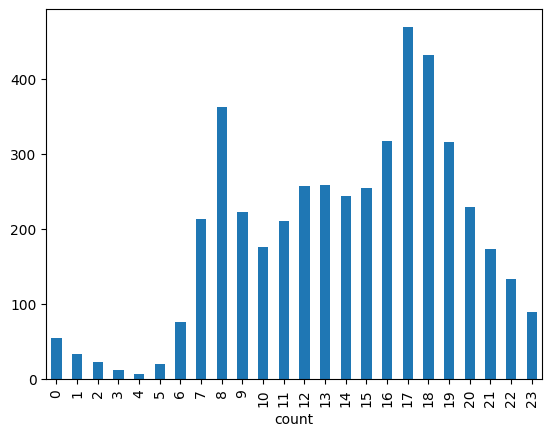

In [25]:
#membuat barplot
countdalamjam.plot(kind='bar',xlabel='count')

dari plot di atas kita bisa mengetahui bahwa penggunaan terbanyak di jam 5 sore dengan tersepinya di jam 4 pagi

<Axes: >

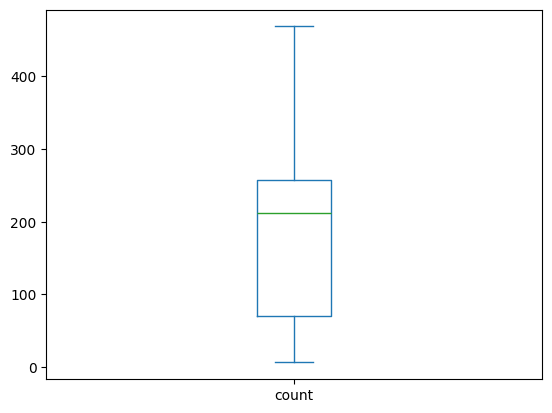

In [26]:
#membuat boxplot
countdalamjam.plot(kind='box')

Dari gambar boxplot kita tidak melihat outlier, di dukung skew yang nilainya di bawah 0,5. data hampir berdistribusi normal. jika memang ada outlier tidak berpengaruh signifkan.

### Dalam jam Hari kerja

In [27]:
#data kerja dalam jam
countdalamjamharikerja =df[(df['workingday']=='Workday')].groupby(df['datetime'].dt.hour)['count'].mean()

In [28]:
#mecari max min mean
maksimum=countdalamjamharikerja.max()
minimum=countdalamjamharikerja.min()
ratarata=countdalamjamharikerja.mean()

print("Maximum peminjam dalam jam dihari kerja:",maksimum)
print("Minimum peminjam dalam jam dihari kerja:",minimum)
print("Rata-Rata peminjam dalam jam dihari kerja:",ratarata)

Maximum peminjam dalam jam dihari kerja: 387.82068965517243
Minimum peminjam dalam jam dihari kerja: 8.544827586206896
Rata-Rata peminjam dalam jam dihari kerja: 188.22791693793923


dalam hari kerja kita medanaptkan maximal jumlah peminjaman berada di 387 orang dan minumnya di 8 org per jamnya dengan rata rata peminjaman sebnayak 188 unit 

In [29]:
#menghitung skew
skewness=countdalamjamharikerja.skew()
print("Skewness:",skewness)

Skewness: 0.21069990025847724


dengan skew 0.21 data sudah mendekati distribusi normal

In [30]:
#menghitung kurtosis
kurtosis=countdalamjamharikerja.kurtosis()
print("kurtosis:",kurtosis)

kurtosis: -1.5625700822779323


nilai kurtosis menujukan bahwa minimnya outlier dna bersifat Platykurtic

<Axes: xlabel='count'>

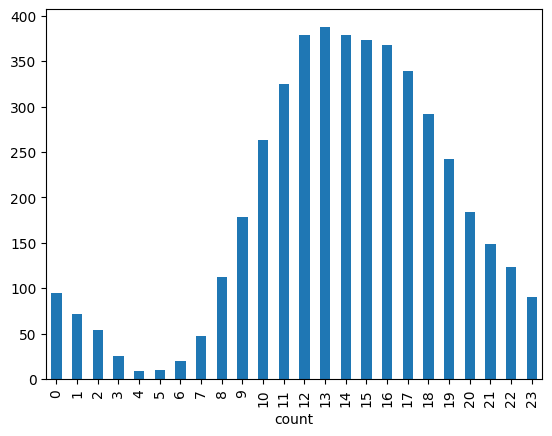

In [31]:
#menampilkan barplot
countdalamjamharikerja.plot(kind='bar',xlabel='count')

dari bar di atas kita mengetahui bahwa pucak peminjaman di jam 12 siang dan tersepinya di jam 4 pagi

<Axes: >

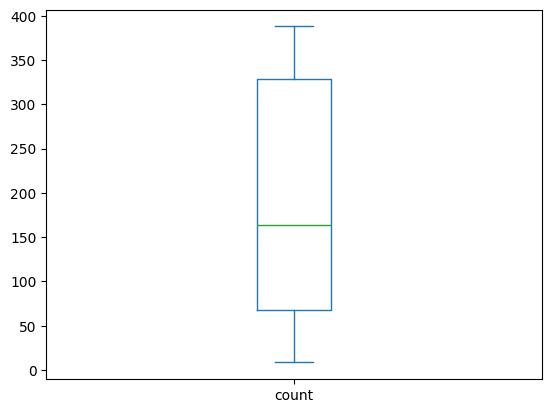

In [32]:
#manmpilkan boxplot
countdalamjamharikerja.plot(kind='box')

Dari data box plot kita mengetahui bahwa data tidak memiliki outlier

### Dalam hari libur

In [33]:
#membuat data jam dan libur
countdalamjamharilibur =df[(df['workingday']=='Holiday')].groupby(df['datetime'].dt.hour)['count'].mean()

In [34]:
#mecari max min mean
maksimum=countdalamjamharilibur.max()
minimum=countdalamjamharilibur.min()
ratarata=countdalamjamharilibur.mean()
median = countdalamjamharilibur.median()
print("Maximum peminjam dalam jam dihari libur:",maksimum)
print("Minimum peminjam dalam jam dihari libur:",minimum)
print("Rata-Rata peminjam dalam jam dihari libur:",ratarata)
print("Nilai tengah peminjam dalam jam dihari libur:",median)

Maximum peminjam dalam jam dihari libur: 529.2090032154341
Minimum peminjam dalam jam dihari libur: 4.892733564013841
Rata-Rata peminjam dalam jam dihari libur: 191.8993485777601
Nilai tengah peminjam dalam jam dihari libur: 182.61093247588425


peminjaman di hari libur paling tinggi sebanyak 529 per jam nya dan paling rendah 4 per jamnya dengan rata rata 191 unit per jamnya

In [35]:
#mencari skew
skewness=countdalamjamharilibur.skew()
print("Skewness:",skewness)

Skewness: 0.7800746505244135


data memiliki skewed sedikit dimana data lebih banyak mendekati nilai tengah yaitu 182

In [36]:
#menghitung kurtosis
kurtosis=countdalamjamharilibur.kurtosis()
print("kurtosis:",kurtosis)

kurtosis: 0.016589773549905207


nilai kurtosis mendekati 0 artinya data mendekati distribusi normal

<Axes: xlabel='count'>

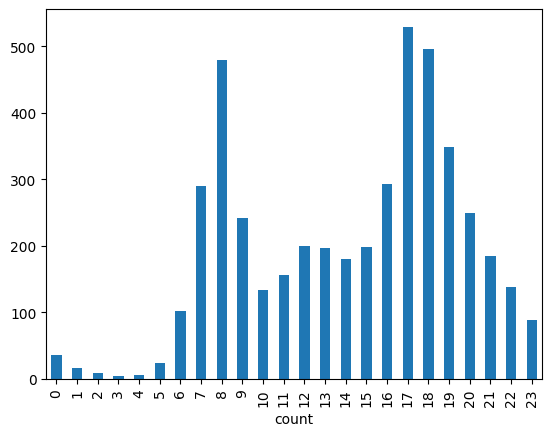

In [37]:
#menampilkan barplot
countdalamjamharilibur.plot(kind='bar',xlabel='count')

kita bisa mengetahui bahwa jam 4 sore merupakan peak dari peminjaman dan tersepinya di jam 3 pagi

<Axes: >

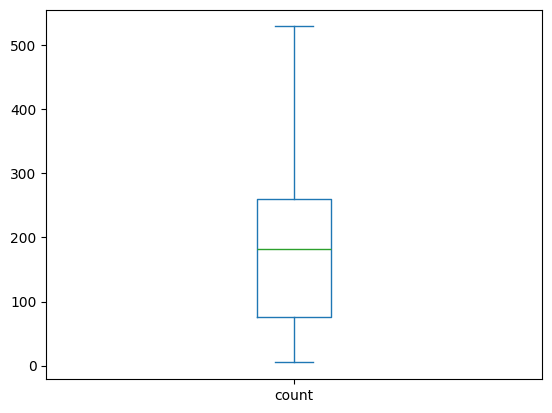

In [38]:
#manmpilkan boxplot
countdalamjamharilibur.plot(kind='box')

dari gambar box yang ada tidak di temukan nya outlier

### Musim

In [39]:
#membuat data masing masing musim
countspring =df[(df['season']=='spring')].groupby(df['datetime'].dt.hour)['count'].mean()
countsummer =df[(df['season']=='summer')].groupby(df['datetime'].dt.hour)['count'].mean()
countfall =df[(df['season']=='fall')].groupby(df['datetime'].dt.hour)['count'].mean()
countwinter =df[(df['season']=='winter')].groupby(df['datetime'].dt.hour)['count'].mean()

In [60]:
#mecari max min mean
maksimumspring=countspring.max()
minimumspring=countspring.min()
ratarataspring=countspring.mean()

maksimumsummer=countsummer.max()
minimumsummer=countsummer.min()
rataratasummer=countsummer.mean()

maksimumfall=countfall.max()
minimumfall=countfall.min()
rataratafall=countfall.mean()

maksimumwinter=countwinter.max()
minimumwinter=countwinter.min()
rataratawinter=countwinter.mean()

print("Maximum peminjam musim spring:",maksimumspring)
print("Minimum peminjam musim spring:",minimumspring)
print("Rata-Rata peminjam musim spring:",ratarataspring)

print('============================================================')
print("Maximum peminjam musim summer:",maksimumsummer)
print("Minimum peminjam musim summer:",minimumsummer)
print("Rata-Rata peminjam musim summer:",rataratasummer)
print('============================================================')
print("Maximum peminjam musim fall:",maksimumfall)
print("Minimum peminjam musim fall:",minimumfall)
print("Rata-Rata peminjam musim fall:",rataratafall)
print('============================================================')
print("Maximum peminjam musim winter:",maksimumwinter)
print("Minimum peminjam musim winter:",minimumwinter)
print("Rata-Rata peminjam musim winter:",rataratawinter)

Maximum peminjam musim spring: 283.4561403508772
Minimum peminjam musim spring: 3.3366336633663365
Rata-Rata peminjam musim spring: 114.64235120667566
Maximum peminjam musim summer: 540.3157894736842
Minimum peminjam musim summer: 6.628318584070796
Rata-Rata peminjam musim summer: 215.02633658260697
Maximum peminjam musim fall: 565.3859649122807
Minimum peminjam musim fall: 8.087719298245615
Rata-Rata peminjam musim fall: 234.19382989183873
Maximum peminjam musim winter: 485.9035087719298
Minimum peminjam musim winter: 7.228070175438597
Rata-Rata peminjam musim winter: 198.85100120091897


dari data di atas kita bisa mengetahui bahwa rata rata setiap musimnya berbeda dengan musim fall memiliki peminjam terbnayak dan musim spring paling sedikit

datetime
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298
Name: count, dtype: float64

In [41]:
#mencari skew
skewnesspring=countspring.skew()
skewnesssummer=countsummer.skew()
skewnessfall=countfall.skew()
skewnesswinter=countwinter.skew()
print("Skewness spring:",skewnesspring)
print("Skewness summer:",skewnesssummer)
print("Skewness fall:",skewnessfall)
print("Skewness winter:",skewnesswinter)

Skewness spring: 0.35412082570132514
Skewness summer: 0.3420671353736658
Skewness fall: 0.29374823244354303
Skewness winter: 0.26306919926712785


dari data skew kita mengetahui bahwa data berdistribusi normal

In [42]:
#menghitung kurtosis
kurtosisspring=countspring.kurtosis()
kurtosissummer=countsummer.kurtosis()
kurtosisfall=countfall.kurtosis()
kurtosiswinter=countspring.kurtosis()
print("kurtosis spring:",kurtosisspring)
print("kurtosis summer:",kurtosissummer)
print("kurtosis fall:",kurtosisfall)
print("kurtosis winter:",kurtosiswinter)

kurtosis spring: -0.6848908653017198
kurtosis summer: -0.4978754721253855
kurtosis fall: -0.47664437969051887
kurtosis winter: -0.6848908653017198


dari data di atas kita bisa mengetahui bahwa data memiliki ekor yang datar atau pendek

<Axes: xlabel='datetime'>

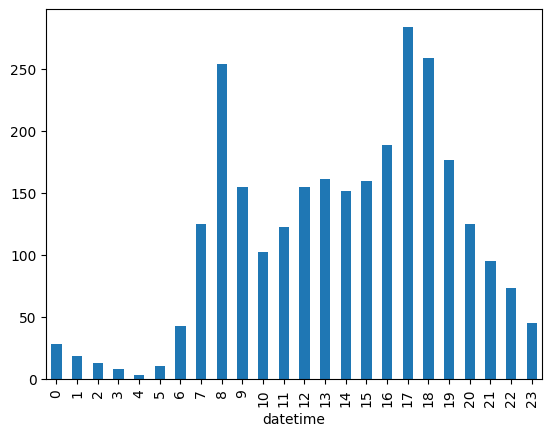

In [43]:
#manmpilkan boxplot spring
countspring.plot(kind='bar')


dari data di atas kita mengetahui bahwa puncaknya di musim spring pada jam 5 sore dan tersepinya jma 4 pagi

<Axes: xlabel='datetime'>

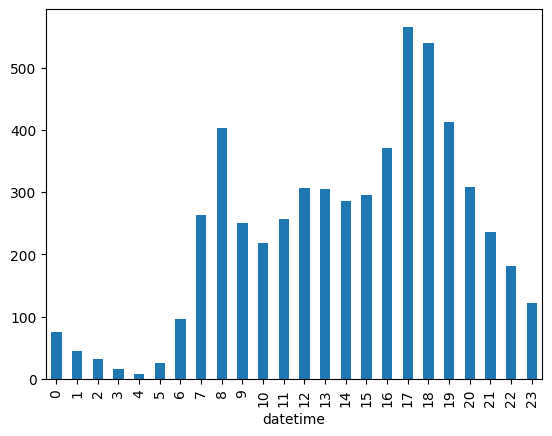

In [44]:
#menampilkan barplot fall
countfall.plot(kind='bar')

dari data di atas kita mengetahui bahwa puncaknya di musim fall pada jam 5 sore dan tersepinya jma 4 pagi

<Axes: xlabel='datetime'>

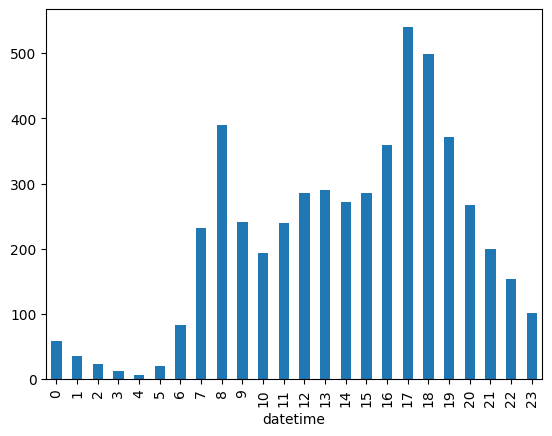

In [45]:
#menampilkan barplot summer
countsummer.plot(kind='bar')

dari data di atas kita mengetahui bahwa puncaknya di musim summer pada jam 5 sore dan tersepinya jma 4 pagi

<Axes: xlabel='datetime'>

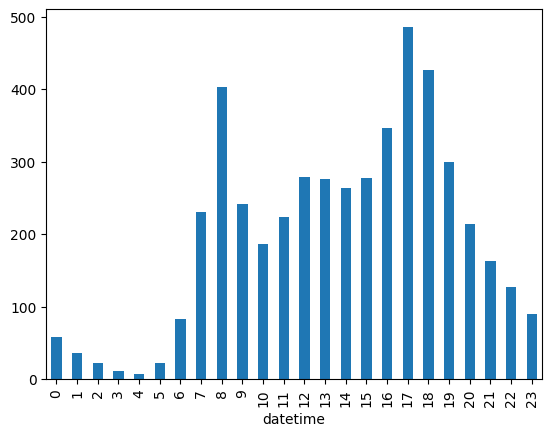

In [46]:
#menampilkan barplot winter
countwinter.plot(kind='bar')

dari data di atas kita mengetahui bahwa puncaknya di musim winter pada jam 5 sore dan tersepinya jma 4 pagi

<Axes: >

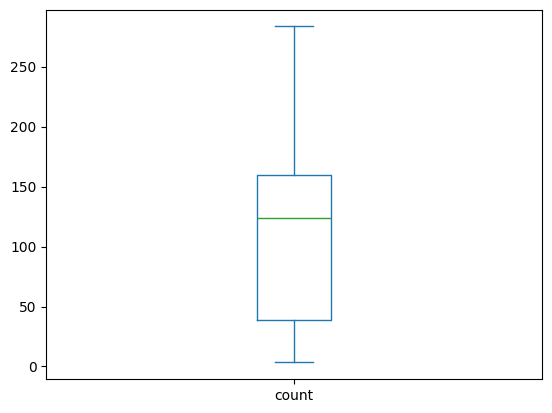

In [47]:
#manmpilkan boxplot spring
countspring.plot(kind='box')

dari boxplot spring tidak ditemukanya outlier

<Axes: >

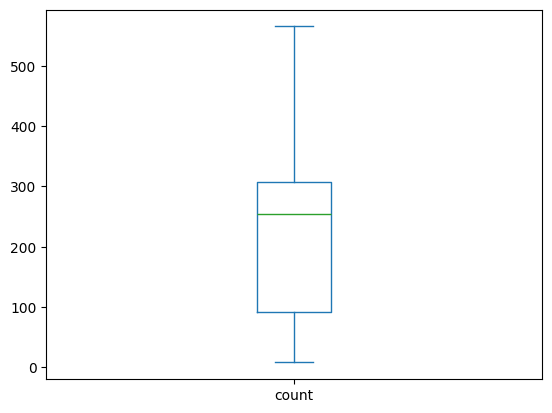

In [48]:
#manmpilkan boxplot fall
countfall.plot(kind='box')

dari boxplot fall tidak ditemukanya outlier

<Axes: >

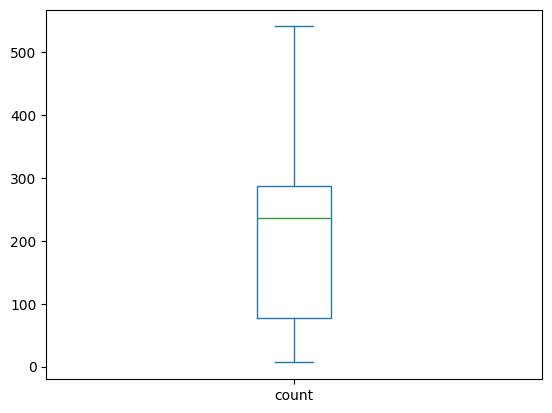

In [49]:
#manmpilkan boxplot summer
countsummer.plot(kind='box')

dari boxplot summer tidak ditemukanya outlier

<Axes: >

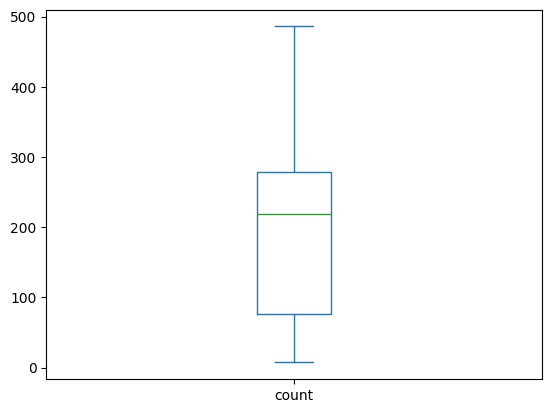

In [50]:
#manmpilkan boxplot winter
countwinter.plot(kind='box')

dari boxplot winter tidak ditemukanya outlier

### Inferensial

In [51]:
from scipy.stats import f_oneway
#membuat data musiman
rental_summer = df[df['season'] == 'summer']['count']
rental_fall = df[df['season'] == 'fall']['count']
rental_winter = df[df['season'] == 'winter']['count']
rental_spring = df[df['season'] == 'spring']['count']

In [52]:
#mnghitung skew
print("skewness:",rental_summer.skew())
print("skewness:",rental_fall.skew())
print("skewness:",rental_winter.skew())
print("skewness:",rental_spring.skew())

skewness: 1.0032642267278118
skewness: 0.9914946474772749
skewness: 1.172117329762622
skewness: 1.8880559001782309


Di keathui data setiap musim tidak berdistribusi normal maka dari itu kita akan melakukan pengujian dengan kruskal

Mencari tahu pengaruh musim terhadap jumlah pengguna

* (H0): Tidak ada perbedaan signifikan dalam jumlah penyewaan antara musim-musim yang diuji.
* (H1): Ada perbedaan signifikan dalam jumlah penyewaan antara musim-musim yang diuji.

In [53]:
from scipy.stats import kruskal
#mencari value p dengan kruskal
H_statistic, p_value = kruskal(rental_summer, rental_fall, rental_winter, rental_spring)

print("Nilai H-statistic:", H_statistic)
print("Nilai p-value:", p_value)

Nilai H-statistic: 699.6668548181988
Nilai p-value: 2.479008372608633e-151


dari uji kruskal di dapati bahwa terdapat pengaruh yang signifikan antara jumlah penyewaan dan musim

Kita akan menguji pengaruh hari libur dan hari kerja dengan anova, akan tetapi sebelom di gunakanya anova kita harus memeastikan data sudah berdistribusi normal

In [54]:
kerja=df.query('workingday == "Workday"')
libur=df.query('workingday == "Holiday"')
#data kerja dan libur
print("skewness kerja", df[(df['workingday']=='Workday')]['count'].skew())
print("skewness libur",df[(df['workingday']=='Holiday')]['count'].skew())

skewness kerja 0.9640377812359698
skewness libur 1.3467224377106803


diketahui data tidak berdstribusi normal maka kita akan coba menghilangkan outlier

In [55]:
#menegtahui oulier kerja 
kerja=df.query('workingday == "Workday"')

q3 = kerja['count'].quantile(0.75)
q1 = kerja['count'].quantile(0.25)

iqr = q3 - q1

min_boundarykerja = q1 - (iqr * 1.5)
max_boundarykerja = q3 + (iqr * 1.5)

print(f'Minimum boundary adalah: {min_boundarykerja}')
print(f'Maximum boundary adalah: {max_boundarykerja}')

outlierkerja = kerja[(kerja['count'] < min_boundarykerja) | (kerja['count'] > max_boundarykerja)]
no_outlierkerja = kerja[(kerja['count'] >= min_boundarykerja) & (kerja['count'] <= max_boundarykerja)]

print(f'Total outlier {len(outlierkerja)} data')
no_outlierkerja['count'].skew()

Minimum boundary adalah: -346.0
Maximum boundary adalah: 694.0
Total outlier 16 data


0.9290494889962104

dari data di atas kita bisa melihat bahwa data tidak berubah secara signifikan, skew yang tadi 0,96 menajdi 0,92 artinya da perubahan data dan penghilanan outlier tapi belum cukup untuk menjadi distribusi normal maka kita akan menggunakan nonparametrik karena kita membandingkan 2 kelompok maka kita akan menggunakan manwhitneyu

In [56]:
from scipy.stats import mannwhitneyu

# Pisahkan data pengguna sepeda untuk hari kerja dan hari libur
users_workday = df[df['workingday'] == 'Workday']['count']
users_holiday = df[df['workingday'] == 'Holiday']['count']

# Lakukan uji Mann-Whitney U
u_statistic, p_value = mannwhitneyu(users_workday, users_holiday)

# Output hasil uji
print("Nilai U-Statistic:", u_statistic)
print("Nilai p-value:", p_value)


Nilai U-Statistic: 12880792.5
Nilai p-value: 0.9679139953914079


* h0: rata rata hari kerja == rata rata hari libur
* h1: rata rata hari libur != rata rata hari kerja

dari data di atas di dapati bahwa nilai p value lebih besar dair 0.05 maka rata rata hari libur tidak sama dengan rata rata hari kerja. dengan kata lain kita tidak bisa membandingkan signifikansi terhadap penggunaan sepeda.

# kesimpulan

* penyewaan paling banyak di gunakan Di hari libur jam 5 sore dan di hari kerja jam 12 siang
* pada setiap musimnya jam teramai ada pada jam 5 sore dan tersepi jam 4 pagi dengan musim fall memiliki peminjam terbanyak dan musim spring tersepi
* dikarenakan data hari kerja dan libur memiliki rata rata yang berbdeda maka kita tidak bisa memastikanya akan tetapi di hari libur puncaknya di jam 5 sore dan di hari kerja puncaknya jam 12 siang. akan tetapi sjika di bandigkan secara rata rata hari libur memiliki rata rata lebih tinggi di bandingkan hari kerja
* rekor waktu penywaan sepi yang pernah tercatat tersepinya terjadi pada 1 januari di hari libur dengan jumlah peminjmam 1 unit

## rekomendasi

* dihari kerja waktu teramai di mulai dari jam 7 sampai jam 11 pastikan untuk menjaga kondisi sepeda tetap prima di jam tersebut dan untuk pengecekan atau perbaikan sebaiknya di lakukan di jam 3 pagi sapai jam 6 pagi
* dihari libur untuk puncaknya berbagi menjadi dua jam 8 pagi dan jam 5 sore dan terdaopat penuruan di jam 9 pagi sampai jam 3 sore sehingga memungkinkan untuk merawat atau mnegecas sebelom di gunakan kembali
* Musim memiliki pengaruh signfikan terhadap jumlah pengguna dengan musim fall memiliki rata rata pengguna terbanyak, pastikan kondisi sepeda dan jumlah sepeda cukup sebelom musim fall